In [57]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### Data Loading

In [58]:
breast = load_breast_cancer()
df_data = pd.DataFrame(breast.data, columns=breast.feature_names)
df_data.insert(0,"target", breast.target)
df_data.head()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [60]:
# Visualisation
fig = px.scatter(df_data, "target", "mean perimeter",
           color=df_data["target"].astype(str),
           color_discrete_map={"1": "blue", "0": "red"})
fig.show()

In [61]:
fig = px.scatter(df_data, "mean perimeter", "mean compactness", color=df_data["target"].astype(str),
                 color_discrete_map={"1": "blue", "0": "red"})
fig.show()

### Fitting Logistic Regression

We want to fit the follwing model

$$ \text{log}(\frac{y_i}{1-y_i}) = \theta_0 + \theta_1 x_{1, i} + \theta_{2, i}$$ 

$$ \iff y_i = \frac{1}{1 + \text{exp}(-\theta^T x)} $$

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(df_data[["mean perimeter", "mean compactness"]], df_data["target"])
model = LogisticRegression().fit(X_train, Y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [15.91653556]
Coefficients: [[-0.16235243 -1.40181364]]


In [63]:
# Visualisation of the results
fig = go.Figure()
colors = Y_train.map({0: "red", 1: "blue"})
fig.add_trace(
    go.Scatter(
        x=X_train["mean perimeter"],
        y=X_train["mean compactness"],
        mode="markers",
        marker=dict(color=colors),
        name="Data"
    )
)

# Adding the separation boundary
theta0 = model.intercept_
theta1, theta2 = model.coef_[0]
x1_values = np.linspace(X_train["mean perimeter"].min(), X_train["mean perimeter"].max(), 100)
func = lambda x: (-theta0 - theta1 * x) / theta2
x2_values = func(x1_values)
arr_plot = np.array(list(zip(x1_values, x2_values)))
arr_plot = arr_plot[(arr_plot[:, 1] >= X_train["mean compactness"].min() - 0.1) & (arr_plot[:, 1] <= X_train["mean compactness"].max() + 0.1)]
fig.add_trace(
    go.Scatter(
        x=arr_plot[:, 0],
        y=arr_plot[:, 1],
        mode='lines',
        name="Separation Boundary",
        line=dict(color="black", width=1, dash="dash")
    )
)
fig.update_layout(
    title_text="Separation Boundary on Training Set"
)

In [64]:
y_predict = model.predict(X_train)

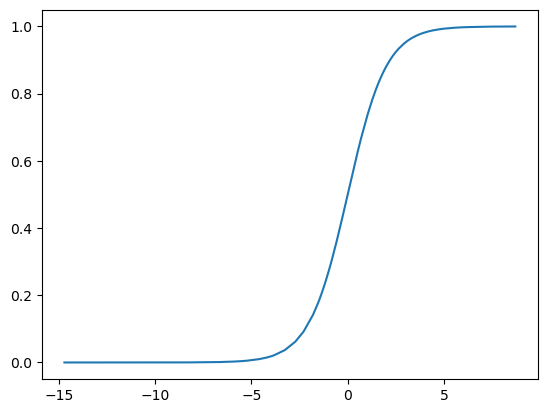

In [65]:
# Sigmooid Function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Training Data
X = X_train.values @ model.coef_[0] + model.intercept_[0]
Y = sigmoid(X)
arr_plot_train = np.array(list(zip(Y, X)))
arr_plot_train = arr_plot_train[arr_plot_train[:,1].argsort()]
arr_plot_train

# Testing Data
X = X_test.values @ model.coef_[0] + model.intercept_[0]
Y = sigmoid(X)
arr_plot_test = np.array(list(zip(Y, X)))
arr_plot_test = arr_plot_test[arr_plot_test[:,1].argsort()]
arr_plot_test

plt.plot(arr_plot_test[:, 1], arr_plot_test[:, 0])